# Sales Analysis - Project

## Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

### Task#1. Load and Concatenate the 12 months data into a single file

In [2]:
#df = pd.read_csv("Sales_Data/Sales_June_2019.csv")

folder_path = "Sales_Data"     # specify your folder path
files = os.listdir(folder_path)
csv_files = [file for file in files if file.endswith('.csv')]

all_data = pd.DataFrame()
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    all_data = pd.concat([all_data, df])
    
all_data.to_csv("Combined_Sales_Data.csv", index=False)


### Task#2. Cleaning the Data, Adding new Colomns

In [3]:
# Read the new combined data

dfs = pd.read_csv("Combined_Sales_Data.csv")

dfs.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# remove NaN values from the data

dfs = dfs.dropna(how='all')

# check and drop duplicate values

dfs = dfs.drop_duplicates()

dfs = dfs[dfs['Order ID'] != 'Order ID']  # filter out some column headers in the data

dfs.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Adding the Total sales, month and years columns

In [5]:
dfs.dtypes

# Change the data types for Price and Quantity to Numeric, change Order data to a date data type

dfs['Quantity Ordered'] = pd.to_numeric(dfs['Quantity Ordered'])  # Change data types
dfs['Price Each'] = pd.to_numeric(dfs['Price Each'])

dfs['Order Date'] = pd.to_datetime(dfs['Order Date'])  # Change to date type

#dfs.info()

In [6]:
# Add the Sales Column to the data

dfs['Sales'] = dfs['Quantity Ordered'] * dfs['Price Each']

dfs.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [7]:
# Extract the month, month name and year columns from the date

dfs['Month'] = dfs['Order Date'].dt.month
dfs['Month Name'] = dfs['Order Date'].dt.strftime('%b')
dfs['Year'] = dfs['Order Date'].dt.year

dfs.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Month Name,Year
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Apr,2019
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Apr,2019
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Apr,2019
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Apr,2019
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Apr,2019


#### Question 1: What was the best month for sales? How much was earned that month?

In [8]:
# Group by 'Month Name' and calculate the sum of 'Sales'
dfs.groupby('Month Name', as_index=False)['Sales'].sum().sort_values(by ='Sales',ascending=False)

,Month Name,Sales
2,Dec,4608295.70
10,Oct,3734777.86
0,Apr,3389217.98
9,Nov,3197875.05
8,May,3150616.23
7,Mar,2804973.35
5,Jul,2646461.32
6,Jun,2576280.15
1,Aug,2241083.37
3,Feb,2200078.08


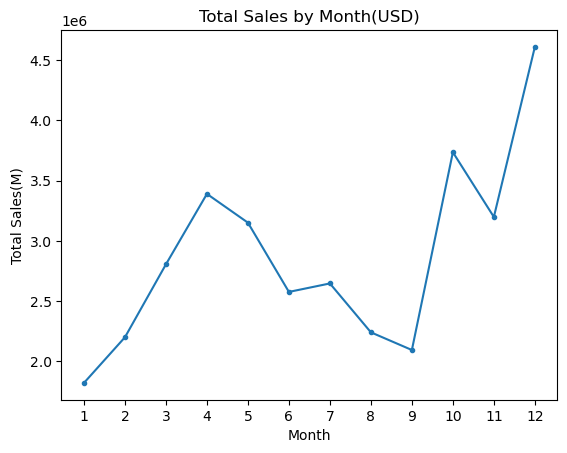

In [9]:
# Graph using bar chart
# Group by 'Month Name' and calculate the sum of 'Sales'

grouped1 =dfs.groupby('Month')['Sales'].sum().reset_index()

plt.plot(grouped1['Month'],grouped1['Sales'], marker ='.')

plt.xlabel('Month')
plt.ylabel('Total Sales(M)')
plt.title('Total Sales by Month(USD)')
plt.xticks(grouped1['Month'])


plt.show()
# From the Analysis; December was the best month with sales of $4608295.70



#### Question 2: Which City had the highest Quantity ordered and sales amount?

In [10]:
# To do this, i need to extract the city from the purchase address column

# Split the 'Purchase Address' column by commas and select the city part (index 1),strip to remove trailing spaces
dfs['City'] = dfs['Purchase Address'].str.split(',').str[1]#.strip()

dfs.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Month Name,Year,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Apr,2019,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Apr,2019,Boston


In [11]:
city_group = dfs.groupby('City',as_index=False)[['Quantity Ordered','Sales']].sum()

city_group

,City,Quantity Ordered,Sales
0,Atlanta,16584,2794199.07
1,Austin,11137,1818044.33
2,Boston,22494,3658627.65
3,Dallas,16707,2765373.96
4,Los Angeles,33247,5448304.28
5,New York City,27903,4661867.14
6,Portland,14037,2319331.94
7,San Francisco,50169,8254743.55
8,Seattle,16534,2745046.02


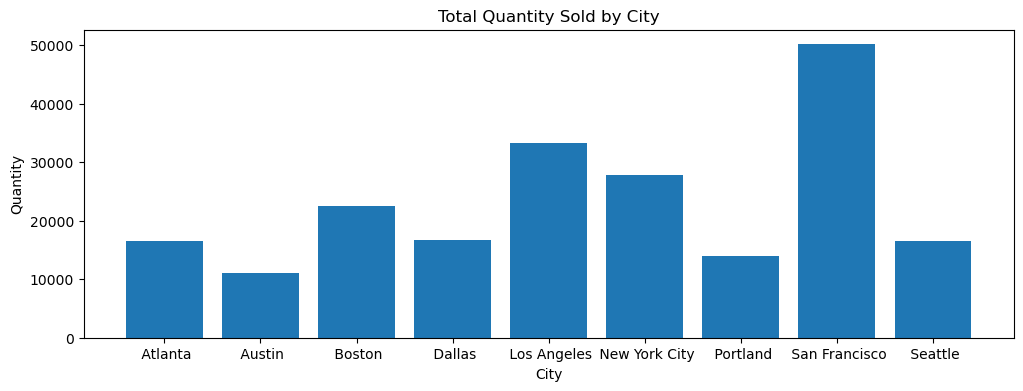

In [12]:
plt.figure(figsize=(12,4))

plt.bar(city_group['City'], city_group['Quantity Ordered'])

plt.xlabel('City')
plt.ylabel('Quantity')
plt.title('Total Quantity Sold by City')
plt.show()

# San Francisco had the highest Quantity Ordered

#### Question 3: Which products generated the most sales?

In [13]:
# Top Products which generated most Sales
products = dfs.groupby('Product', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=True)

products

,Product,Sales
5,AAA Batteries (4-pack),92648.14
4,AA Batteries (4-pack),106041.60
17,Wired Headphones,246082.76
15,USB-C Charging Cable,285975.45
12,Lightning Charging Cable,346376.55
10,LG Dryer,387600.00
11,LG Washing Machine,399600.00
0,20in Monitor,453818.74
16,Vareebadd Phone,827200.00
2,27in FHD Monitor,1131074.59


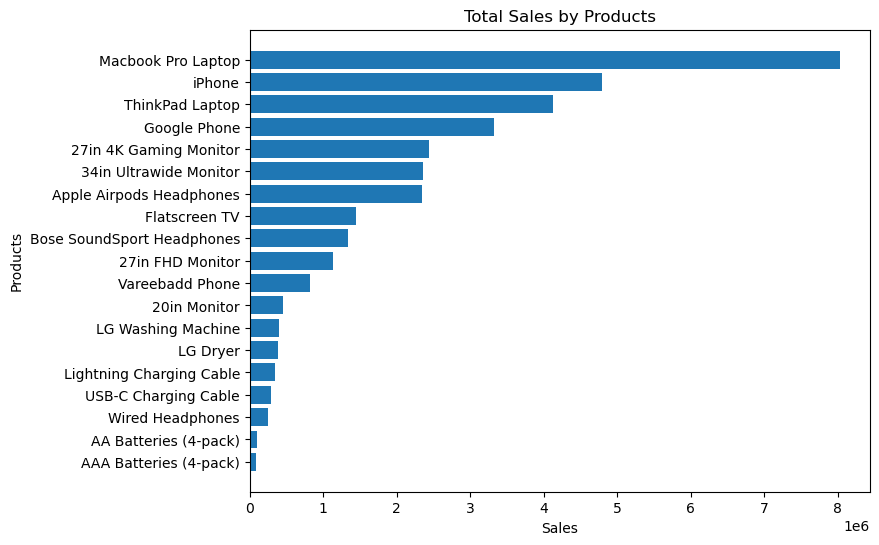

In [14]:
plt.figure(figsize=(8,6))

plt.barh(products['Product'],products['Sales'])

plt.title('Total Sales by Products')
plt.xlabel('Sales')
plt.ylabel('Products')

plt.show()

# Macbook Pro Laptop, Iphone and ThinkPad Laptop were the top 3 Products

#### Question 4: What time should we display advertisement to maximize likelihood of customers's buying products?

In [15]:
# need to extract the hour from the order date as a new column

dfs['Hour'] = dfs['Order Date'].dt.hour

In [16]:
dfs.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Month Name,Year,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Apr,2019,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Apr,2019,Boston,22


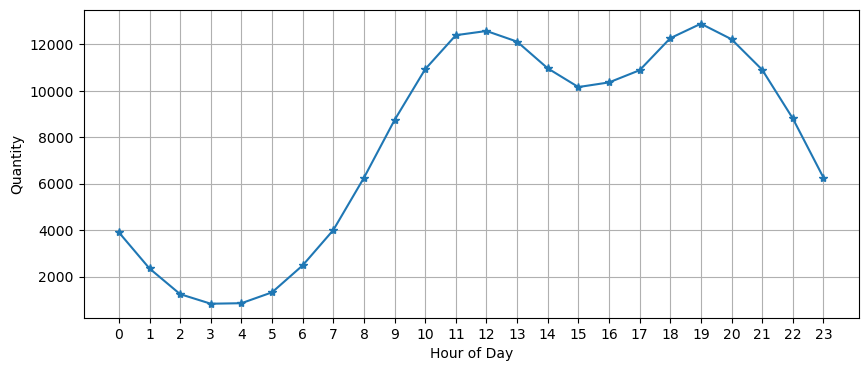

In [17]:
Hour_group = dfs.groupby('Hour', as_index=False)['Quantity Ordered'].count()

plt.figure(figsize=(10,4))

plt.plot(Hour_group['Hour'], Hour_group['Quantity Ordered'],marker='*')

plt.xticks(Hour_group['Hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Quantity')
plt.grid()
plt.show()

# From the chart, I would recommend around 10am - 1pm or 6pm - 7pm

#### Question 5: What products are most often sold together

In [18]:
# Create a new df for Order IDs that repeats, check for duplicated Order Ids
new_df = dfs[dfs['Order ID'].duplicated(keep=False)]

# join the Order ID and product column into a single column as a new column
new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# remove other columns
new_df = new_df[['Order ID', 'Grouped']].drop_duplicates()

new_df.head(10)



C:\Users\GREEN LION\AppData\Local\Temp\ipykernel_9868\2832844556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"
250,176797,"Google Phone,Bose SoundSport Headphones,Wired ..."


In [19]:
# Import new libraries for the combinations
from itertools import combinations
from collections import Counter


count = Counter()

for row in new_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))           # check the number to compare eg; 2

for key, value in count.most_common(10):                      # count the top 10 most common combination
    print(key, value)







# STEPS
# Identify orders with multiple products.
# Create combinations of products within each order.
# Count the frequency of product combinations.
# Identify the most frequent combinations.


('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Bonus: Use Pivot table to find the Sales by Month in each City

In [20]:
dfs.pivot_table(values='Sales',index='Month Name',columns='City',aggfunc='sum',margins=True,margins_name='Grand Total')

City,Atlanta,Austin,Boston,Dallas,Los Angeles,New York City,Portland,San Francisco,Seattle,Grand Total
Month Name,,,,,,,,,,
Apr,284422.01,172683.59,353392.17,251235.54,550080.29,449314.88,239978.12,812387.30,275724.08,3389217.98
Aug,169267.66,125563.62,239260.31,179663.47,344163.58,302401.53,152712.79,538715.31,189335.10,2241083.37
Dec,360494.32,233315.10,509480.38,380706.86,682740.98,646508.85,303461.13,1105582.13,386005.95,4608295.70
Feb,176458.31,108358.52,213612.59,186656.00,341958.68,305372.26,149439.87,546891.60,171330.25,2200078.08
Jan,149159.54,88087.06,201057.75,143450.52,288589.95,259829.34,114985.56,435561.39,140692.05,1821413.16
Jul,211663.49,150324.93,291478.35,212325.17,394054.77,355698.16,176415.63,641989.89,212510.93,2646461.32
Jun,219801.52,144057.29,254461.17,186873.80,451524.25,323886.60,169460.46,612373.49,213841.57,2576280.15
Mar,231605.38,154391.59,301023.81,222373.69,429613.58,367226.31,186948.03,693102.14,218688.82,2804973.35
May,238842.00,160635.22,328791.70,268326.61,499586.23,436120.42,231708.01,774967.54,211638.50,3150616.23


In [21]:
dfs.to_csv('cleaned_data.csv', index=False)